<h1 style="color:Red;"> Importing the libaries </h1>

In [167]:
import pandas as pd
import numpy as np

<h1 style="color:Green;"> Sanitisation </h1>

In [168]:
FullSetClean = pd.read_csv("data_edited3.csv")

#####
"""
Put Further Sanitation Code here.
OR any sanitation code
"""
FullSetClean = FullSetClean.drop(columns = "currency")

stateBin = []
for row in FullSetClean["state"]:
    if row == "successful":
        stateBin.append(1)
    else:
        stateBin.append(0)

FullSetClean["StateBin"] = stateBin
FullSetClean = FullSetClean.drop(columns = "state")
FullSetClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45585 entries, 0 to 45584
Data columns (total 9 columns):
name                45585 non-null object
category            45585 non-null object
deadline            45585 non-null object
launched            45585 non-null object
backers             45585 non-null int64
country             45585 non-null object
usd_pledged_real    45585 non-null float64
usd_goal_real       45585 non-null float64
StateBin            45585 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.1+ MB


<h1 style="color:Fuchsia;"> The functions related to the words </h1>

<h1 style="color:Teal;"> Letter Related Functions </h1>

In [169]:

def StartingChar(string : str): # discontinued as does not output a numerical number that could be used later.
    return string[0]

def Length(string : str):
    return len(string)

def NumberOfWords(string :  str):
    output = 0
    string = string.split()
    for word in string:
         if any(c.isalpha() for c in word): ##sees if there is a letter in the collection of chars
                output += 1
    return output

def Capitilisation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char.islower():
            plus +=1
        elif char.isupper():
            minus += 1
    return (plus/(plus + minus))

def Punctuation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char in ". , / ? ; : ‘ () !”":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def nonPunctuation(string:str):
    plus = 0
    minus = 0
    for char in string:
        if char in "\|£$%^&*-_+={}[]@~#<>¬":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def Vowels(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "aeiou":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def Plositives(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "ptkbdg":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def frictives(string : str):
    plus = 0
    minus = 0
    string  = string.lower()
    for char in string:
        if char in "fsvz":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def alliteration(string : str):
    output = 0
    string = string.lower()
    string = string.split()
    previousLetter = ""
    output = 0
    for word in string:
        if word[0] == previousLetter:
                output += 1
        else:
            previousLetter = word[0]
        
    return output

functionList = [
                [Length , "Word Length"],
                [NumberOfWords , "Number Of Words"],
                [Capitilisation , "Capitilisation"],
                [Punctuation , "Punctuation"],
                [nonPunctuation , "nonPunctuation"],
                [Vowels , "Vowels"],
                [Plositives, "Plositives"],
                [frictives,"frictives"],
                [alliteration,"alliteration"]
               ]
    
print(NumberOfWords("Test Test test a!")) 
print (frictives("test test test"))
print (Capitilisation("TEst Test Test"))
print (alliteration("Fest Test test"))

4
0.25
0.6666666666666666
1


In [170]:
# At some point this will be changed to a genralised function.
#base plan:
#all the analytics function will take a string return a number (float or int 64 )

#there will be an itterator high order function that takes the analytic function. 
#and the applies it to all of the titles and returns a list


###The itterator high order

def itterator(function,ColName,dataSet):
    output = list()
    for n , string in enumerate(dataSet["name"]):
        output.append(function(string))
    dataSet[ColName] = output
    


In [171]:

for point in functionList:
    itterator(point[0],point[1],FullSetClean)
    print(point[0])

print ("done functions")

<function Length at 0x7f5028943d90>
<function NumberOfWords at 0x7f5028bd1f28>
<function Capitilisation at 0x7f5037ca4ea0>
<function Punctuation at 0x7f50366f30d0>
<function nonPunctuation at 0x7f50366f3950>
<function Vowels at 0x7f50347f5048>
<function Plositives at 0x7f50347f51e0>
<function frictives at 0x7f50347f5488>
<function alliteration at 0x7f50347f5510>
done functions


<h1 style="color:Orange;"> Time Related Functions </h1>

In [172]:
import datetime
def dateTimeitterator(dataSet):
    Launchweekdays = []
    Launchhours = []
    elapsedDays= []
    deadlineweekdays = []
    draw = []
    sraw = []
    
    for n , string in enumerate(dataSet["launched"]):
        date , time = string.split(" ")
        day , month ,year = date.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))

        
        Launchweekdays.append(int(raw.weekday()))
        Launchhours.append(int(hour))
        sraw.append(raw)
        
    for n , string in enumerate(dataSet["deadline"]):
        
        day , month ,year = string.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))
        deadlineweekdays.append(raw.weekday())
        draw.append(raw)
        

    elapsedDays = [(a - b).days for a, b in zip(sraw, draw)]
    dataSet["LaunchWeekday"] = Launchweekdays
    dataSet["LaunchHour"] =  Launchhours
    dataSet["elapsedDay"] = elapsedDays
    dataSet["deadlineWeekday"] = deadlineweekdays
    
 

In [173]:

dateTimeitterator(FullSetClean)
print ("done Timeritterato")

done Timeritterato


<h1 style="color:salmon;"> Data Base Splitting (to be added data base correction) + Dataset Balancing </h1>

In [174]:
# Data base splitting done bellow 

from sklearn.model_selection import train_test_split

train,other = train_test_split(FullSetClean, test_size=0.6,random_state=0);

validation , test = train_test_split(other, test_size=0.5,random_state=0);

train.head()

# FullSetClean.head()
# FullSetClean.info(verbose = True)

# BALANCES THE TRAINING DATASET:

total = len(train)
nb_pos = train['StateBin'].sum()
nb_neg = total - nb_pos

success_pos = train.loc[train['StateBin'] == 1]
success_neg = train.loc[train['StateBin'] == 0].sample(nb_pos)

resampled_train = pd.concat((success_pos, success_neg))

# CHECKS THAT RESAMPLING HAS BEEN SUCCESSFUL:

# total = len(resampled_train)
# nb_pos = resampled_train['StateBin'].sum()
# nb_neg = total - nb_pos

# print('Successful: {}' .format(nb_pos))
# print('Failed: {}' .format(nb_neg))

# BALANCES THE VALIDATION DATASET:

total = len(validation)
nb_pos = validation['StateBin'].sum()
nb_neg = total - nb_pos

success_pos = validation.loc[validation['StateBin'] == 1]
success_neg = validation.loc[validation['StateBin'] == 0].sample(nb_pos)

resampled_validation = pd.concat((success_pos, success_neg))

# CHECKS THAT RESAMPLING HAS BEEN SUCCESSFUL:

# total = len(resampled_validation)
# nb_pos = resampled_validation['StateBin'].sum()
# nb_neg = total - nb_pos

# print('Successful: {}' .format(nb_pos))
# print('Failed: {}' .format(nb_neg))

<h1 style="color:Purple;"><i> Now for the word proccessing </i></h1>

In [175]:
import re

def sanitiser(title : str) -> list: #takes a string splits into words , makes lower case and removes punctuation
    words = title.split()
    output = []
    for word in words:
       output.append(re.sub(r'\W+', '', word).lower())
    return output

def WordFinder(dataSet,cutoff : int) -> dict and list: #so takes in the data set , a cut off an renturns a list of all words above the cutoff and their percentage chance of succsess
    LargeWordDictionary = {} #The dict for all of the words 
    
    for n , title in enumerate(dataSet["name"]): #goes through the big old list
        temp = sanitiser(title) #sanitises the function
        for word in temp: #basically sees if the word is already in the large list of words if it is then it adds its location in the data base to the end of the dict entry
            try:
                LargeWordDictionary[word].append(n)
            except KeyError:
                LargeWordDictionary[word] = [n]
                
    SmallWordDictionary = {} #small output dictionary
    StateBin = dataSet["StateBin"].tolist() #transfers database to list due to pandas related issues
    for word in LargeWordDictionary: # goes through large dictionary , counts number of instances of each word appearing , and then uses the pointers to find if they were success 
        Suc = 0
        for pointer in LargeWordDictionary[word]:
            Suc += StateBin[int(pointer)]
        length = len(LargeWordDictionary[word])
        if length >= cutoff:
            SmallWordDictionary[word] = [length , Suc/length]
    print(len(SmallWordDictionary))
    
    WordLevels = [[a,[]] for a in range(10)]
    for word in SmallWordDictionary:
        WordLevels[int(SmallWordDictionary[word][1]*10)][1].append(word)
    
    return SmallWordDictionary , WordLevels
        
    #return LargeWordDictionary


def WordScore(title : str,AssementDictionary : dict ,split : int) ->list:
    title = sanitiser(title)
    output = [0 for i in range(split)]
    unique = 0
    for word in title:
        try:
            temp = AssementDictionary[word][1]
            for i in range(split):
                if temp > 1 *((i+1)/split):
                    pass
                else:
                    output[i] += 1
                    break
        except KeyError:
            unique += 1
    return output , unique


def wordItterator(dataset , split): #### UNUSED FUNCTION AT THE MOMENT
    output = []
    for n , title in enumerate(dataSet["name"]):
        output.append(WordScore(title,dataset,assmentDict,split))
    output = np.transpose(output)
    for n , row in enumerate(output):
        dataset[str(n)] = row
        
        
    
def wordWorst(title : str , AssementDict : dict):
    title = sanitiser(title)
    unique = 0
    for word in title:
        try:
            temp = AssementDict[word][1]
            if temp > maximum:
                maximum = temp
            elif temp < minimum:
                minimum = temp
        except KeyError:
            unique += 1
        except NameError:
            maximum , minimum = temp , temp
    
    try:
        return maximum , minimum , unique
    except NameError:
        return 0.5 , 0.5 , unique #There may be a better way of dealig with this but this just an easy way to deal with it.
    
    
def wordWorstItterator(dataSet,AssmentDict):
    maximum = []
    minimum = []
    unique = []
    TotalFailures = 0
    for n , title in enumerate(dataSet["name"]):
        temp = wordWorst(title ,AssmentDict )
        maximum.append(temp[0])
        minimum.append(temp[1])
        unique.append(temp[2])
        if temp[0] > 0.7 and temp[1] < 0.3:
            TotalFailures += 1
    dataSet["maximum"] = maximum
    dataSet["minimum"] = minimum
    dataSet["unique"] = unique
    print(TotalFailures)
    
sanitiser("ghgh ghgh!!!!  FDKFKF  g")

#728 2633 56

['ghgh', 'ghgh', 'fdkfkf', 'g']

In [176]:
TrainAll,TrainClasses = WordFinder(resampled_train,40)

wordWorstItterator(resampled_train,TrainAll)
wordWorstItterator(resampled_validation,TrainAll)

print(TrainClasses)

print (WordScore("miniatures blank food",TrainAll,10))



241
35
22
[[0, ['online']], [1, ['app', 'clothing', 'social']], [2, ['truck', 'food', 'brand', 'organic', 'fitness', 'apparel', 'trump', 'fashion', 'y']], [3, ['mobile', 'be', 'people', 'life', 'de', 'case', 'el', 'video', 'movie', 'journey', 'my', 'star', 'guide', 'making', 'recording', 'power', 'can', 'dog', 'just', 'through', 'or']], [4, ['your', 'for', 'to', 'fun', 'family', 'with', 'art', 'and', 'water', 'project', 'experience', 'out', 'man', 'production', 'design', 'custom', 'help', 'get', 'on', 'true', 'story', 'handmade', 'pet', 'it', 'series', 'live', 'show', 'system', 'studio', 'books', 'kids', 'back', 'real', 'more', 'la', 'fund', 'we', 'our', 'way', 'coffee', 'world', 'magazine', 'great', 'next', 'photography', 'childrens', 'up', 'company', 'me', 'cafe', 'launch', 'hand', 'natural', 'i', 'support', 'free', 'school', 'what', 'dream']], [5, ['a', 'from', 'co', 'premium', '', 'no', 'into', 'card', 'game', 'the', 'all', 'in', 'an', 'new', 'is', 'of', 'gaming', 'novel', 'box', '

<h1 style="color:Navy;"> Machine Learning Code Taken From Tutorial </h1>

In [177]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

def select_column_to_add(X_train, y_train, X_val, y_val, columns_in_model, columns_to_test):
    
    column_best = None
    columns_in_model = list(columns_in_model)
    
    if len(columns_in_model) == 0:
        acc_best = 0
    elif len(columns_in_model) == 1:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model].values.reshape(-1, 1), y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model].values.reshape(-1, 1)))
    else:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model], y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model]))

    
    for column in columns_to_test:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model+[column]], y_train)
        y_pred = mod.predict(X_val[columns_in_model+[column]])
        acc = accuracy_score(y_val, y_pred)
        
        if acc - acc_best >= 0.005:  # one of our stopping criteria
            acc_best = acc
            column_best = column
        
    if column_best is not None:  # the other stopping criteria
        print('Adding {} to the model'.format(column_best))
        print('The new best validation accuracy is {}'.format(acc_best))
        columns_in_model_updated = columns_in_model + [column_best]
    else:
        print('Did not add anything to the model')
        columns_in_model_updated = columns_in_model
    
    return columns_in_model_updated, acc_best

In [178]:
dropstuff = ["StateBin","name","category","deadline","launched","country","usd_goal_real","usd_pledged_real","backers"]

Ytrain = train[["StateBin"]]  #what you want to predict
Xtrain = train.drop(columns = dropstuff) #all the other data
Yval = validation[["StateBin"]]  #what you want to predict
Xval = validation.drop(columns = dropstuff) #all the other data

Xtrain.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18234 entries, 27204 to 2732
Data columns (total 13 columns):
Word Length        18234 non-null int64
Number Of Words    18234 non-null int64
Capitilisation     18234 non-null float64
Punctuation        18234 non-null float64
nonPunctuation     18234 non-null float64
Vowels             18234 non-null float64
Plositives         18234 non-null float64
frictives          18234 non-null float64
alliteration       18234 non-null int64
LaunchWeekday      18234 non-null int64
LaunchHour         18234 non-null int64
elapsedDay         18234 non-null int64
deadlineWeekday    18234 non-null int64
dtypes: float64(6), int64(7)
memory usage: 1.9 MB


In [179]:
columns_to_test = set(Xtrain)
full_list = set(Xtrain)

columns_in_model = list();

for i in range(4):
    columns_in_model , acc = select_column_to_add(Xtrain,Ytrain,Xval,Yval,columns_in_model,columns_to_test)    
    columns_to_test = full_list.difference(columns_in_model)

Adding Vowels to the model
The new best validation accuracy is 0.5869835466179159
Did not add anything to the model
Did not add anything to the model
Did not add anything to the model


<h1 style="color:DodgerBlue;"> Now For the Graphs </h1>

In [180]:
def percentageAtIntervalFloat(dataSet ,varible : str,splits : int) -> list :
    #create the search thing
    minimum = dataSet[varible].min()
    maximum = dataSet[varible].max()
    print(minimum , maximum)
    difference = maximum - minimum
    space = difference / splits
    output = [[a,[0,0]] for a in np.arange(minimum,maximum,space)]
    testLevels = [a for a in np.arange(minimum,maximum,space)]
    Values = dataSet[varible].tolist()
    successes = dataSet["StateBin"].tolist()
    
    for Value , success in zip(Values,successes):
        for n , level in enumerate(testLevels):
            if Value <= level:
                if  success == 1:
                    output[n][1][1] += 1
                else:
                    output[n][1][0] += 1
                break
    
    percentOutput = []
    for level in output:
        if level[1][1] == 0:
            percentOutput.append(0)
        else:
            percentOutput.append(level[1][1]/(level[1][1]+level[1][0]))
    return percentOutput

def percentageAtIntervalInt(dataSet ,varible : str) -> list : ###Recode so that it works with intergers
    #create the search thing
    minimum = dataSet[varible].min()
    maximum = dataSet[varible].max()
    difference = maximum - minimum
    output = [[a,[0,0]] for a in np.arange(minimum,maximum)]
    testLevels = [a for a in np.arange(minimum,maximum)]
    Values = dataSet[varible].tolist()
    successes = dataSet["StateBin"].tolist()
    
    for Value , success in zip(Values,successes):
        for n , level in enumerate(testLevels):
            if Value <= level:
                if  success == 1:
                    output[n][1][1] += 1
                else:
                    output[n][1][0] += 1
                break
    
    percentOutput = []
    for level in output:
        if level[1][1] == 0:
            percentOutput.append(0)
        else:
            percentOutput.append(level[1][1]/(level[1][1]+level[1][0]))
    return percentOutput
    

Word Length
1 60
Number Of Words
1 16
Capitilisation
0.0 1.0
Punctuation
0.0 0.5666666666666667
nonPunctuation
0.0 0.46153846153846156
Vowels
0.0 1.0
Plositives
0.0 1.0
frictives
0.0 0.6666666666666666
alliteration
0 6


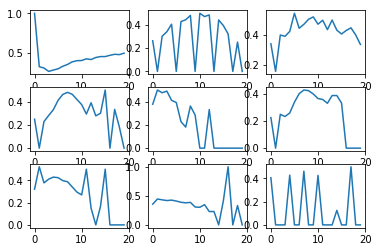

In [181]:
import matplotlib.pyplot as plt
test["Vowels"].max()
for n , Fun in enumerate(functionList):

    print(Fun[1])
    LookList = percentageAtIntervalFloat(FullSetClean , Fun[1],20)
    plt.subplot(3,3,n + 1)
    plt.plot(LookList)

In [182]:
resampled_train.info()
resampled_train["Number Of Words"].dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14914 entries, 2269 to 29527
Data columns (total 25 columns):
name                14914 non-null object
category            14914 non-null object
deadline            14914 non-null object
launched            14914 non-null object
backers             14914 non-null int64
country             14914 non-null object
usd_pledged_real    14914 non-null float64
usd_goal_real       14914 non-null float64
StateBin            14914 non-null int64
Word Length         14914 non-null int64
Number Of Words     14914 non-null int64
Capitilisation      14914 non-null float64
Punctuation         14914 non-null float64
nonPunctuation      14914 non-null float64
Vowels              14914 non-null float64
Plositives          14914 non-null float64
frictives           14914 non-null float64
alliteration        14914 non-null int64
LaunchWeekday       14914 non-null int64
LaunchHour          14914 non-null int64
elapsedDay          14914 non-null int64
deadli

dtype('int64')

<h1> Tree Code </h1>

In [183]:
###The bit of the code when we standardise the data

resampled_train.drop(columns=["usd_pledged_real","launched","backers","deadline"],inplace=True)
resampled_validation.drop(columns=["usd_pledged_real","launched","backers","deadline"],inplace=True)



X_train = resampled_train.drop(columns = "StateBin")
Y_train = resampled_train["StateBin"]

X_validation = resampled_validation.drop(columns="StateBin")
Y_validation = resampled_validation["StateBin"]



In [184]:
for col in X_train.columns:
    if X_train[col].dtype == "int64" or X_train[col].dtype == "float64":
        X_means = X_train[col].mean(axis=0)
        X_stds = X_train[col].std(axis=0)

        # Standardise the splits.
        X_train[col] = (X_train[col] - X_means) / X_stds
        X_validation[col] = (X_validation[col] - X_means) / X_stds
    else:
        X_train.drop(columns =str(col),inplace=True)
        X_validation.drop(columns=str(col),inplace=True)


X_train.head()

,usd_goal_real,Word Length,Number Of Words,Capitilisation,Punctuation,nonPunctuation,Vowels,Plositives,frictives,alliteration,LaunchWeekday,LaunchHour,elapsedDay,deadlineWeekday,maximum,minimum,unique
2269,-0.029859,0.758289,1.060479,0.190390,0.585289,-0.524129,-0.253888,0.445263,-1.154145,-0.491079,1.448833,-1.455714,0.469691,0.431851,1.465510,0.511873,0.380398
1372,-0.032522,0.374951,-0.152000,0.235017,-0.873962,2.133641,0.428839,-0.351942,-0.656976,-0.491079,-0.217029,-1.880530,0.205857,0.431851,0.641936,0.867820,-0.211985
23774,-0.009050,0.055502,0.252159,-0.534275,0.514064,0.989324,1.232220,-0.801962,-0.470389,-0.491079,-0.772316,-0.039660,0.205857,-0.089109,0.065435,-0.229503,0.380398
5292,-0.032772,-0.966734,-0.556160,0.207096,0.179304,-0.524129,-0.354289,-1.074465,0.297914,-0.491079,-1.327604,-1.314108,0.205857,-0.610068,-0.394494,-0.079376,-0.804368
19919,-0.032240,-1.222293,-0.960320,-0.002317,-0.322834,-0.524129,-0.284366,-0.735782,1.823085,-0.491079,0.338258,1.234789,0.997358,-0.089109,3.326370,2.226951,-1.396751


In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_model = None
max_validation_accuracy = 0




for k in range(0):
    model = RandomForestClassifier(random_state=1, n_estimators=5, max_depth=k, min_impurity_decrease=0.01)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_validation)
    accuracy = accuracy_score(Y_validation, y_pred)
    print('Number of trees: {}, accuracy: {} '.format(k, accuracy))
    if accuracy > max_validation_accuracy:
        max_validation_accuracy = accuracy
        best_model = model

print('Optimal number of trees: {}'.format(len(best_model.estimators_)))

Number of trees: 0, accuracy: 0.6188916430594901 
Number of trees: 1, accuracy: 0.6021600566572238 
Number of trees: 2, accuracy: 0.6174752124645893 
Number of trees: 3, accuracy: 0.603399433427762 
Number of trees: 4, accuracy: 0.6057896600566572 
Number of trees: 5, accuracy: 0.6000354107648725 
Number of trees: 6, accuracy: 0.6032223796033994 
Number of trees: 7, accuracy: 0.6041076487252125 
Number of trees: 8, accuracy: 0.6218130311614731 
Number of trees: 9, accuracy: 0.6088881019830028 
Number of trees: 10, accuracy: 0.6080028328611898 
Number of trees: 11, accuracy: 0.6154390934844193 
Number of trees: 12, accuracy: 0.6156161473087819 
Number of trees: 13, accuracy: 0.6155276203966006 
Number of trees: 14, accuracy: 0.6135800283286119 
Number of trees: 15, accuracy: 0.5738314447592068 
Number of trees: 16, accuracy: 0.5 
Number of trees: 17, accuracy: 0.617121104815864 
Number of trees: 18, accuracy: 0.5737429178470255 
Number of trees: 19, accuracy: 0.6088881019830028 
Optimal

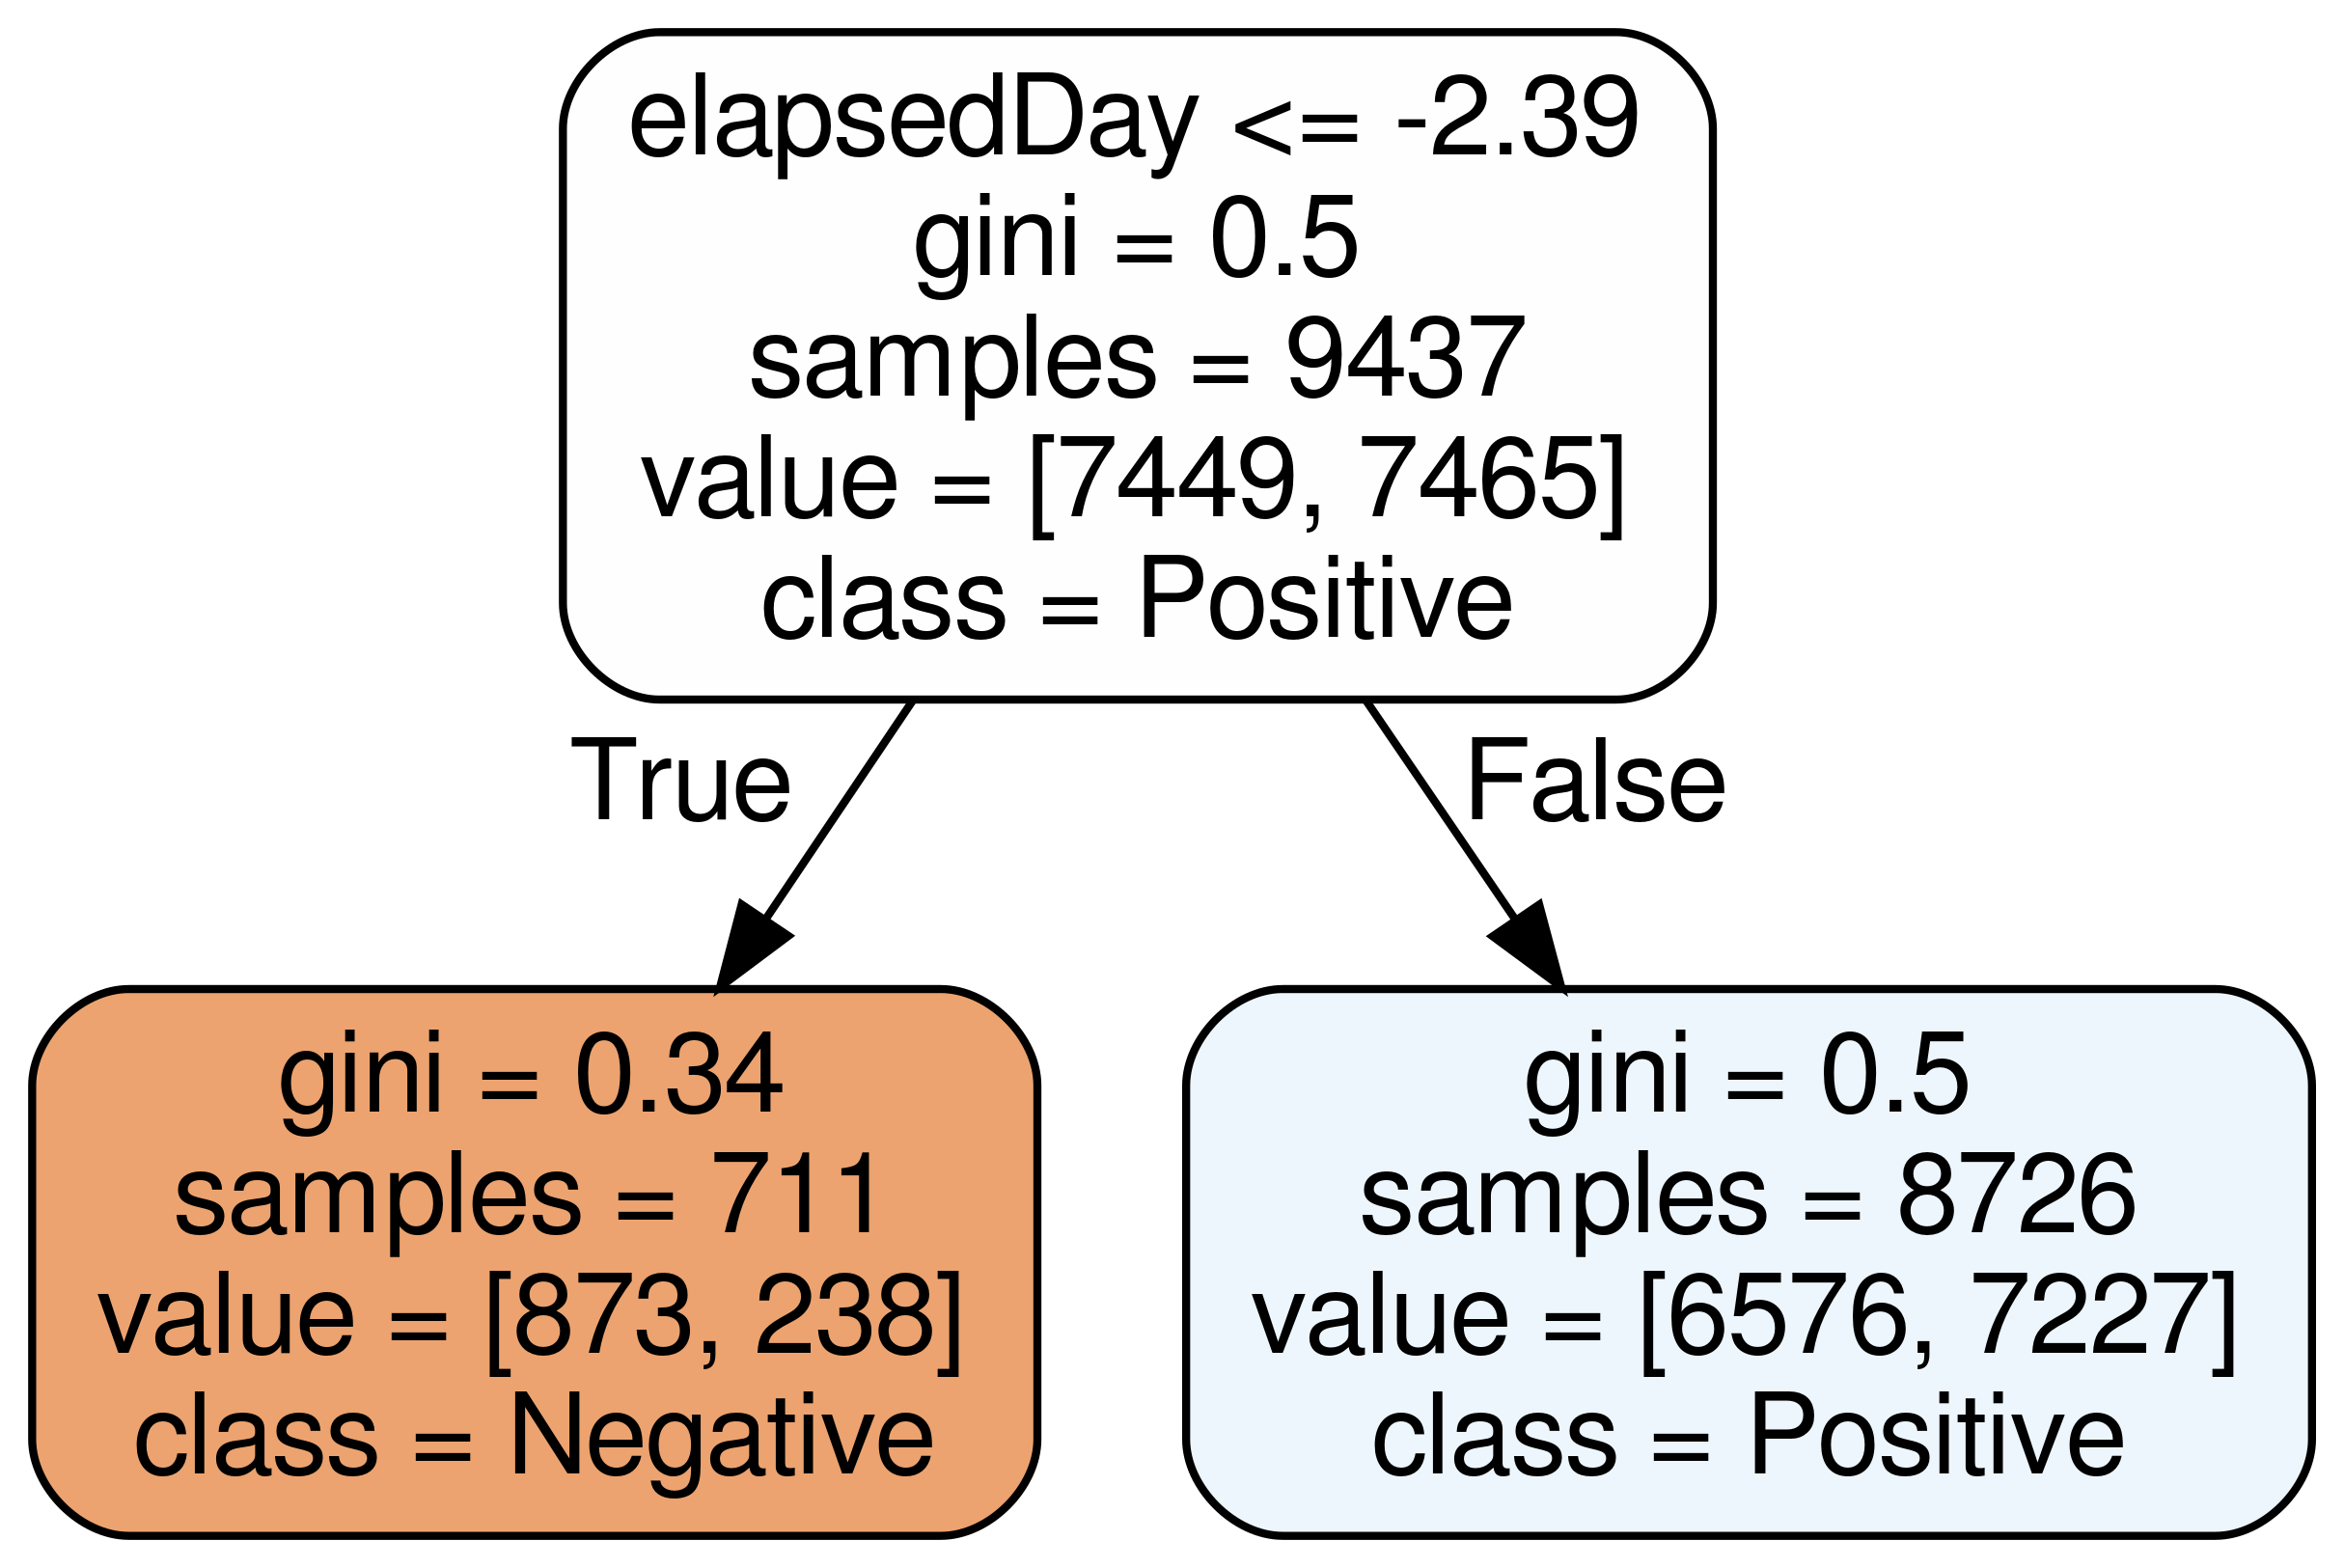

In [186]:
estimator = best_model.estimators_[4]

from sklearn.tree import export_graphviz
# Export as dot file
predictors = X_train.columns

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = predictors,
                class_names = ('Negative', 'Positive'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [187]:
from sklearn.tree import DecisionTreeClassifier

# your code here
dt = DecisionTreeClassifier(max_depth = 9) # Our classification tree
dt = dt.fit(X_train, Y_train)

In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# your code here
Y_validation
print('\nFor the validation set:')
print('Accuracy: \t{}'.format(accuracy_score(Y_validation, dt.predict(X_validation))))
print('Precision: \t{}'.format(precision_score(Y_validation, dt.predict(X_validation))))
print('Recall: \t{}'.format(recall_score(Y_validation, dt.predict(X_validation))))



For the validation set:
Accuracy: 	0.6367740793201133
Precision: 	0.6364117958679145
Recall: 	0.6381019830028328


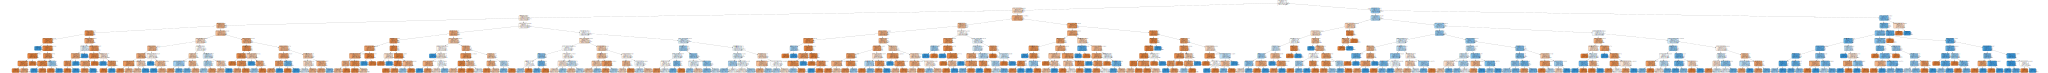

In [189]:
import sklearn.tree as tree
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 

predictors = X_train.columns
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names = predictors,
                                class_names = ('Negative', 'Positive'),
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)  
graph 